<a href="https://colab.research.google.com/github/felipeeduardor/Departamento_de_Vendas/blob/main/Departamento_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depertamento de Vendas


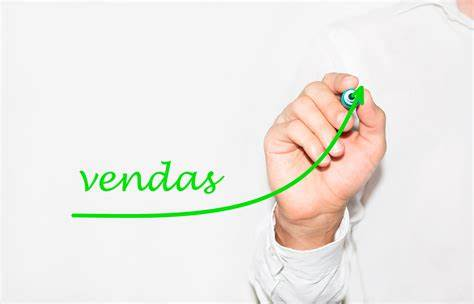

# **Importação das Bibliotecas e base de dados**

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Dados das vendas

In [95]:
Base = pd.read_csv('/content/train (1).csv')
Base.head()

<ipython-input-95-4f334c7cd819>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Base = pd.read_csv('/content/train (1).csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0


In [96]:
# olha o final da base dos dados
Base.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
224064,1065,1,2015-01-12,6001,585,1,1.0,0.0,0.0
224065,1066,1,2015-01-12,12690,1232,1,1.0,0.0,0.0
224066,1067,1,2015-01-12,7535,562,1,1.0,0.0,0.0
224067,1068,1,2015-01-12,5561,381,1,1.0,0.0,0.0
224068,1069,1,2015-01-12,8996,973,1,NaN,NaN,NaN


In [97]:
# ler o tamanho da base de dados
Base.shape

(224069, 9)

In [98]:
Base['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [99]:
Base['Open'].unique()

array([1, 0])

In [100]:
Base['Promo'].unique()

array([ 1.,  0., nan])

In [101]:
Base['StateHoliday'].unique()

array(['0', 'a', 'b', 0.0, nan], dtype=object)

In [102]:
Base['SchoolHoliday'].unique()

array([ 1.,  0., nan])

In [103]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224069 entries, 0 to 224068
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          224069 non-null  int64  
 1   DayOfWeek      224069 non-null  int64  
 2   Date           224069 non-null  object 
 3   Sales          224069 non-null  int64  
 4   Customers      224069 non-null  int64  
 5   Open           224069 non-null  int64  
 6   Promo          224068 non-null  float64
 7   StateHoliday   224068 non-null  object 
 8   SchoolHoliday  224068 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 15.4+ MB


In [104]:
Base.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,224069.000000,224069.000000,224069.000000,224069.000000,224069.000000,224068.000000,224068.000000
mean,557.890270,3.975735,5919.064239,629.085733,0.835970,0.397884,0.138172
std,321.815215,1.993369,3816.295114,451.569731,0.370303,0.489462,0.345082
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3961.000000,417.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5934.000000,609.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8006.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


Dados das Lojas

In [105]:
# carregar dados
Store_info_df = pd.read_csv('/content/store.csv')
Store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [106]:
Store_info_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [107]:
Store_info_df.shape

(1115, 10)

In [108]:
Store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [109]:
Store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#  Explorando os dados

Dados das vendas

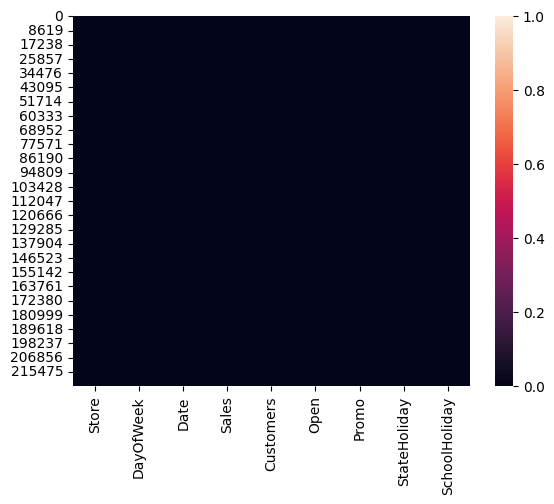

In [110]:
sns.heatmap(Base.isnull());

In [111]:
Base.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

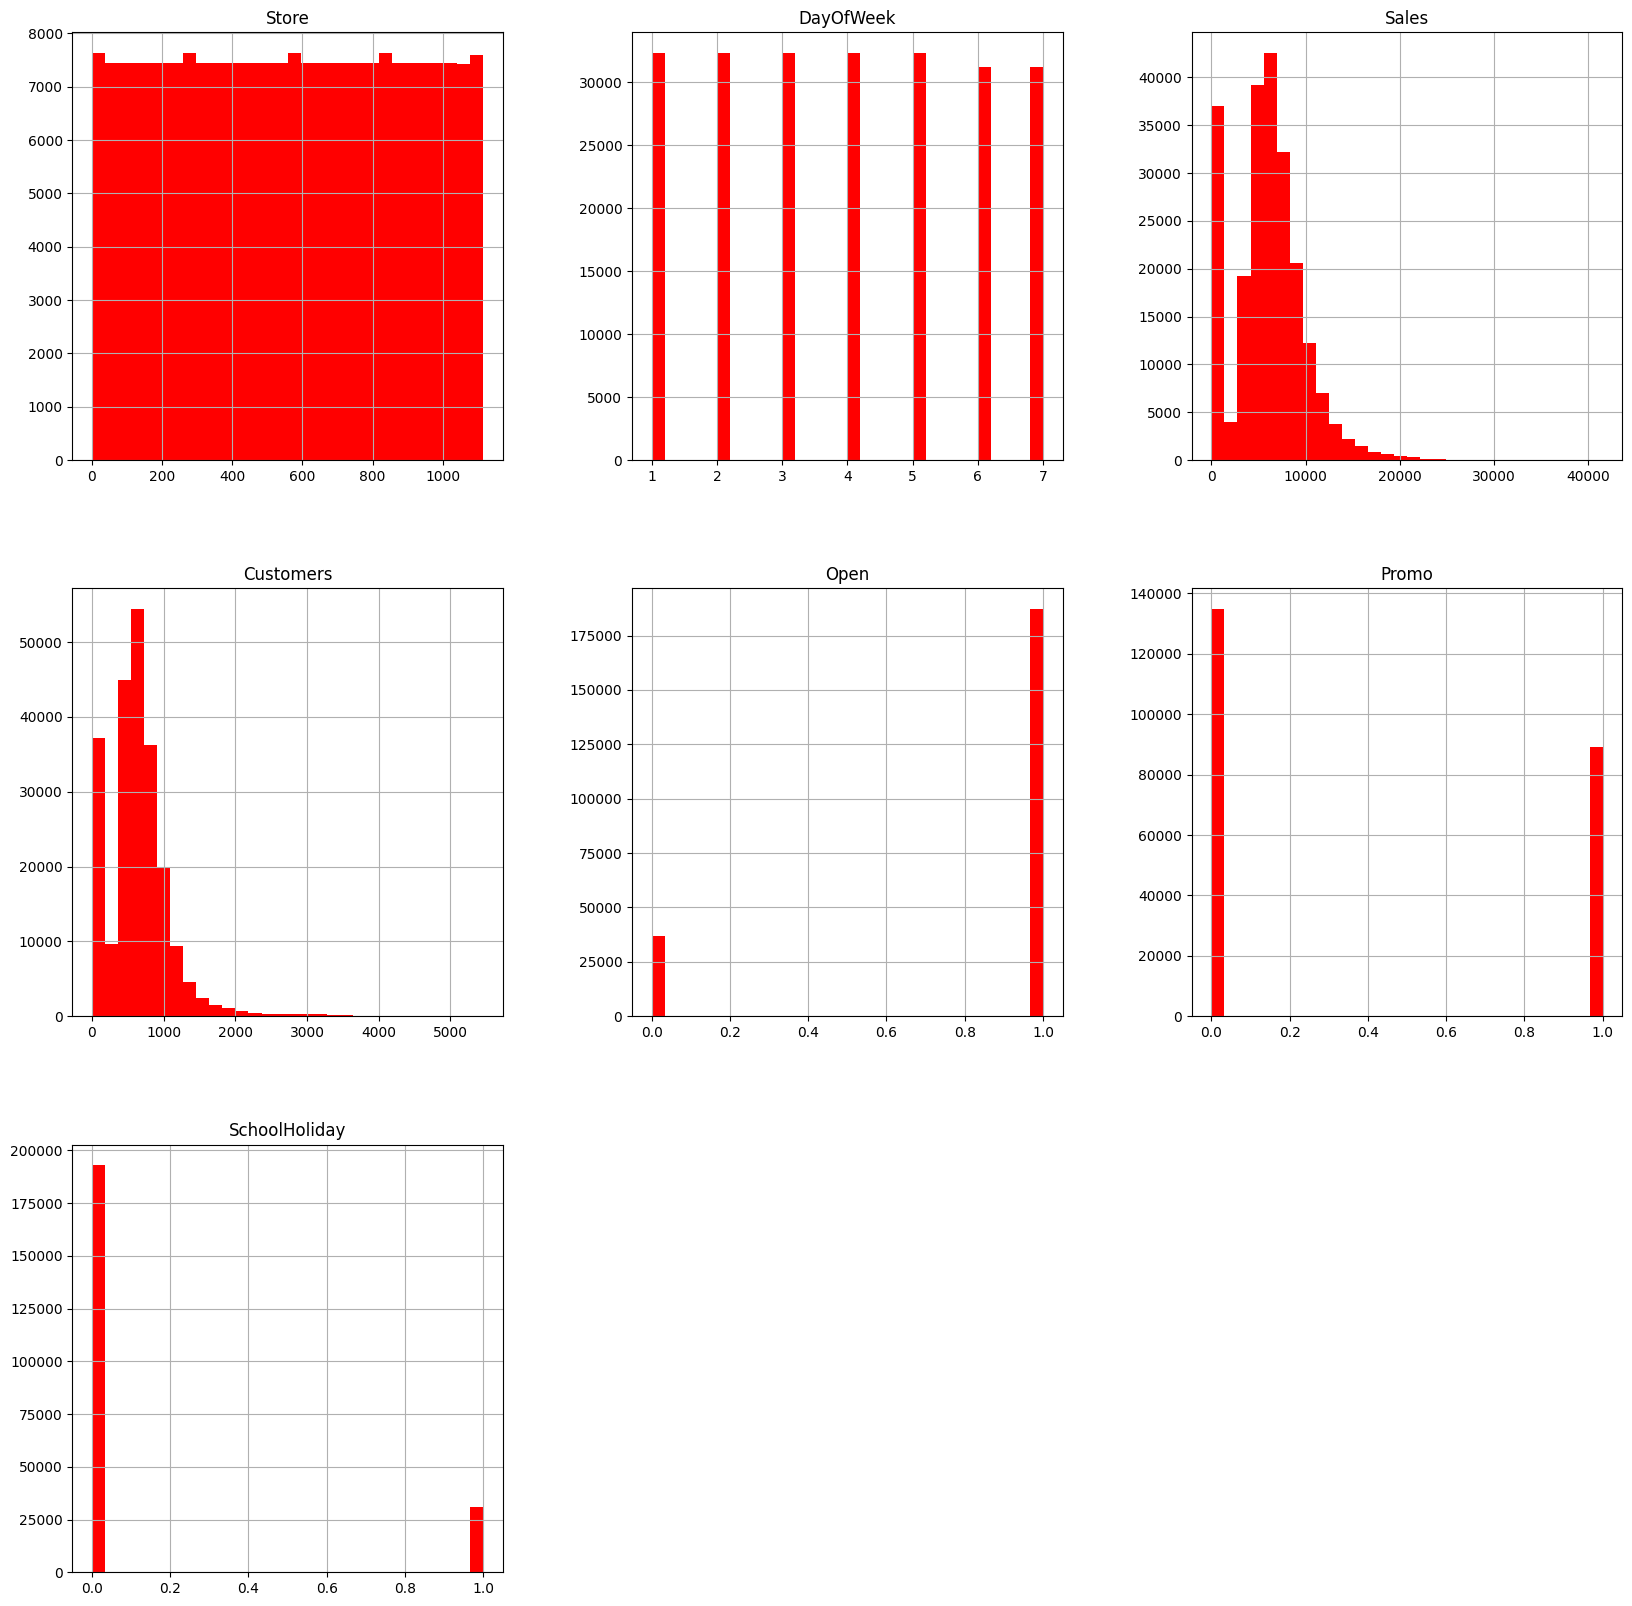

In [112]:
Base.hist(bins=30, figsize=(20,20), color = 'r')

In [113]:
Base['Customers'].max()

5458

In [114]:
loja_fechada = Base[Base["Open"]==0]
loja_aberta = Base[Base["Open"]==1]

In [115]:
print('Total =',len(Base))
print('Número de lojas/dias fechado = ',len(loja_fechada))
print('Número de lojas/dias aberto', len(loja_aberta))

Total = 224069
Número de lojas/dias fechado =  36754
Número de lojas/dias aberto 187315


In [116]:
12919 / len(Store_info_df)

11.586547085201794

In [117]:
loja_fechada.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1.0,0,1.0
875,876,5,2015-07-31,0,0,0,1.0,0,1.0
1406,292,4,2015-07-30,0,0,0,1.0,0,1.0
1990,876,4,2015-07-30,0,0,0,1.0,0,1.0
2521,292,3,2015-07-29,0,0,0,1.0,0,1.0


In [118]:
Base = Base[Base['Open'] == 1]

In [119]:
Base.shape

(187315, 9)

In [120]:
Base

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
224064,1065,1,2015-01-12,6001,585,1,1.0,0.0,0.0
224065,1066,1,2015-01-12,12690,1232,1,1.0,0.0,0.0
224066,1067,1,2015-01-12,7535,562,1,1.0,0.0,0.0
224067,1068,1,2015-01-12,5561,381,1,1.0,0.0,0.0


In [121]:
Base.drop(['Open'], axis=1, inplace=True)

In [122]:
Base.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1.0,0,1.0


In [123]:
Base.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,187315.000000,187315.000000,187315.000000,187315.000000,187314.000000,187314.000000
mean,557.892459,3.507471,7080.473027,752.521747,0.459998,0.151969
std,321.724246,1.711466,3032.894936,388.635905,0.498399,0.358992
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,5035.000000,520.000000,0.000000,0.000000
50%,557.000000,3.000000,6518.000000,669.000000,0.000000,0.000000
75%,836.000000,5.000000,8475.000000,877.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000


# Dados das Lojas

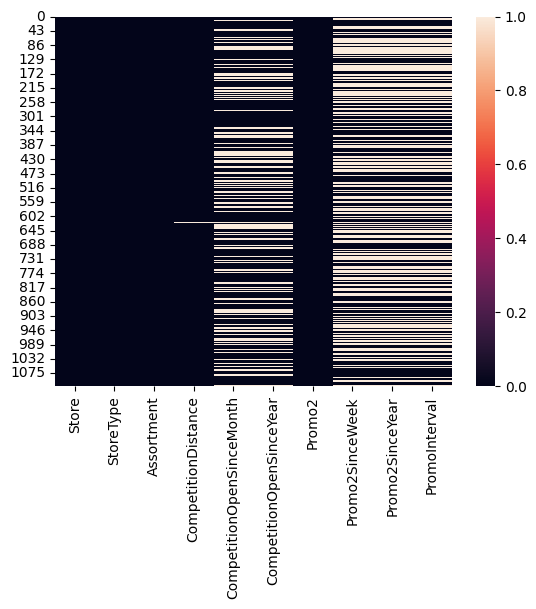

In [124]:
sns.heatmap( Store_info_df.isnull());

In [125]:
Store_info_df[Store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [126]:
Store_info_df[Store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [127]:
Store_info_df[Store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [128]:
Store_info_df[Store_info_df['Promo2'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [129]:
Store_info_df[Store_info_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [130]:
Store_info_df[Store_info_df['Promo2SinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [131]:
Store_info_df[Store_info_df['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [132]:
Store_info_df[Store_info_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [133]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  Store_info_df[str].fillna(0, inplace=True)

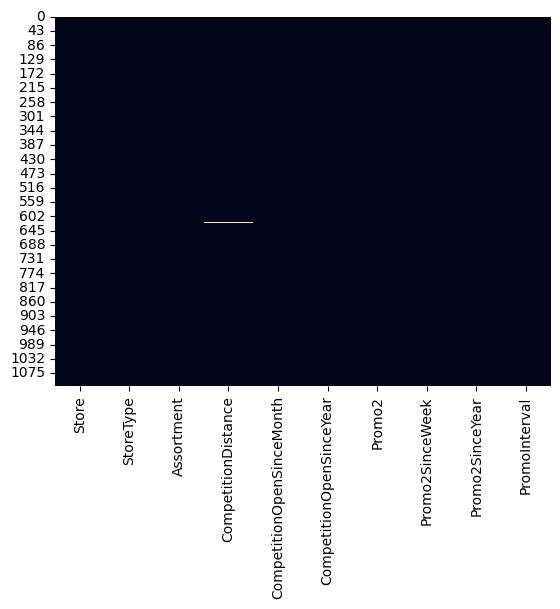

In [134]:
sns.heatmap(Store_info_df.isnull(), cbar=False);

In [135]:
Store_info_df['CompetitionDistance'].fillna(Store_info_df['CompetitionDistance'].mean(),inplace=True)

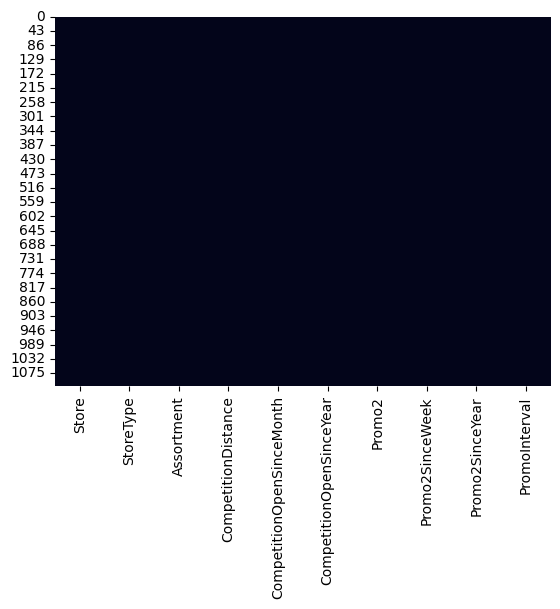

In [136]:
sns.heatmap(Store_info_df.isnull(), cbar=False);

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

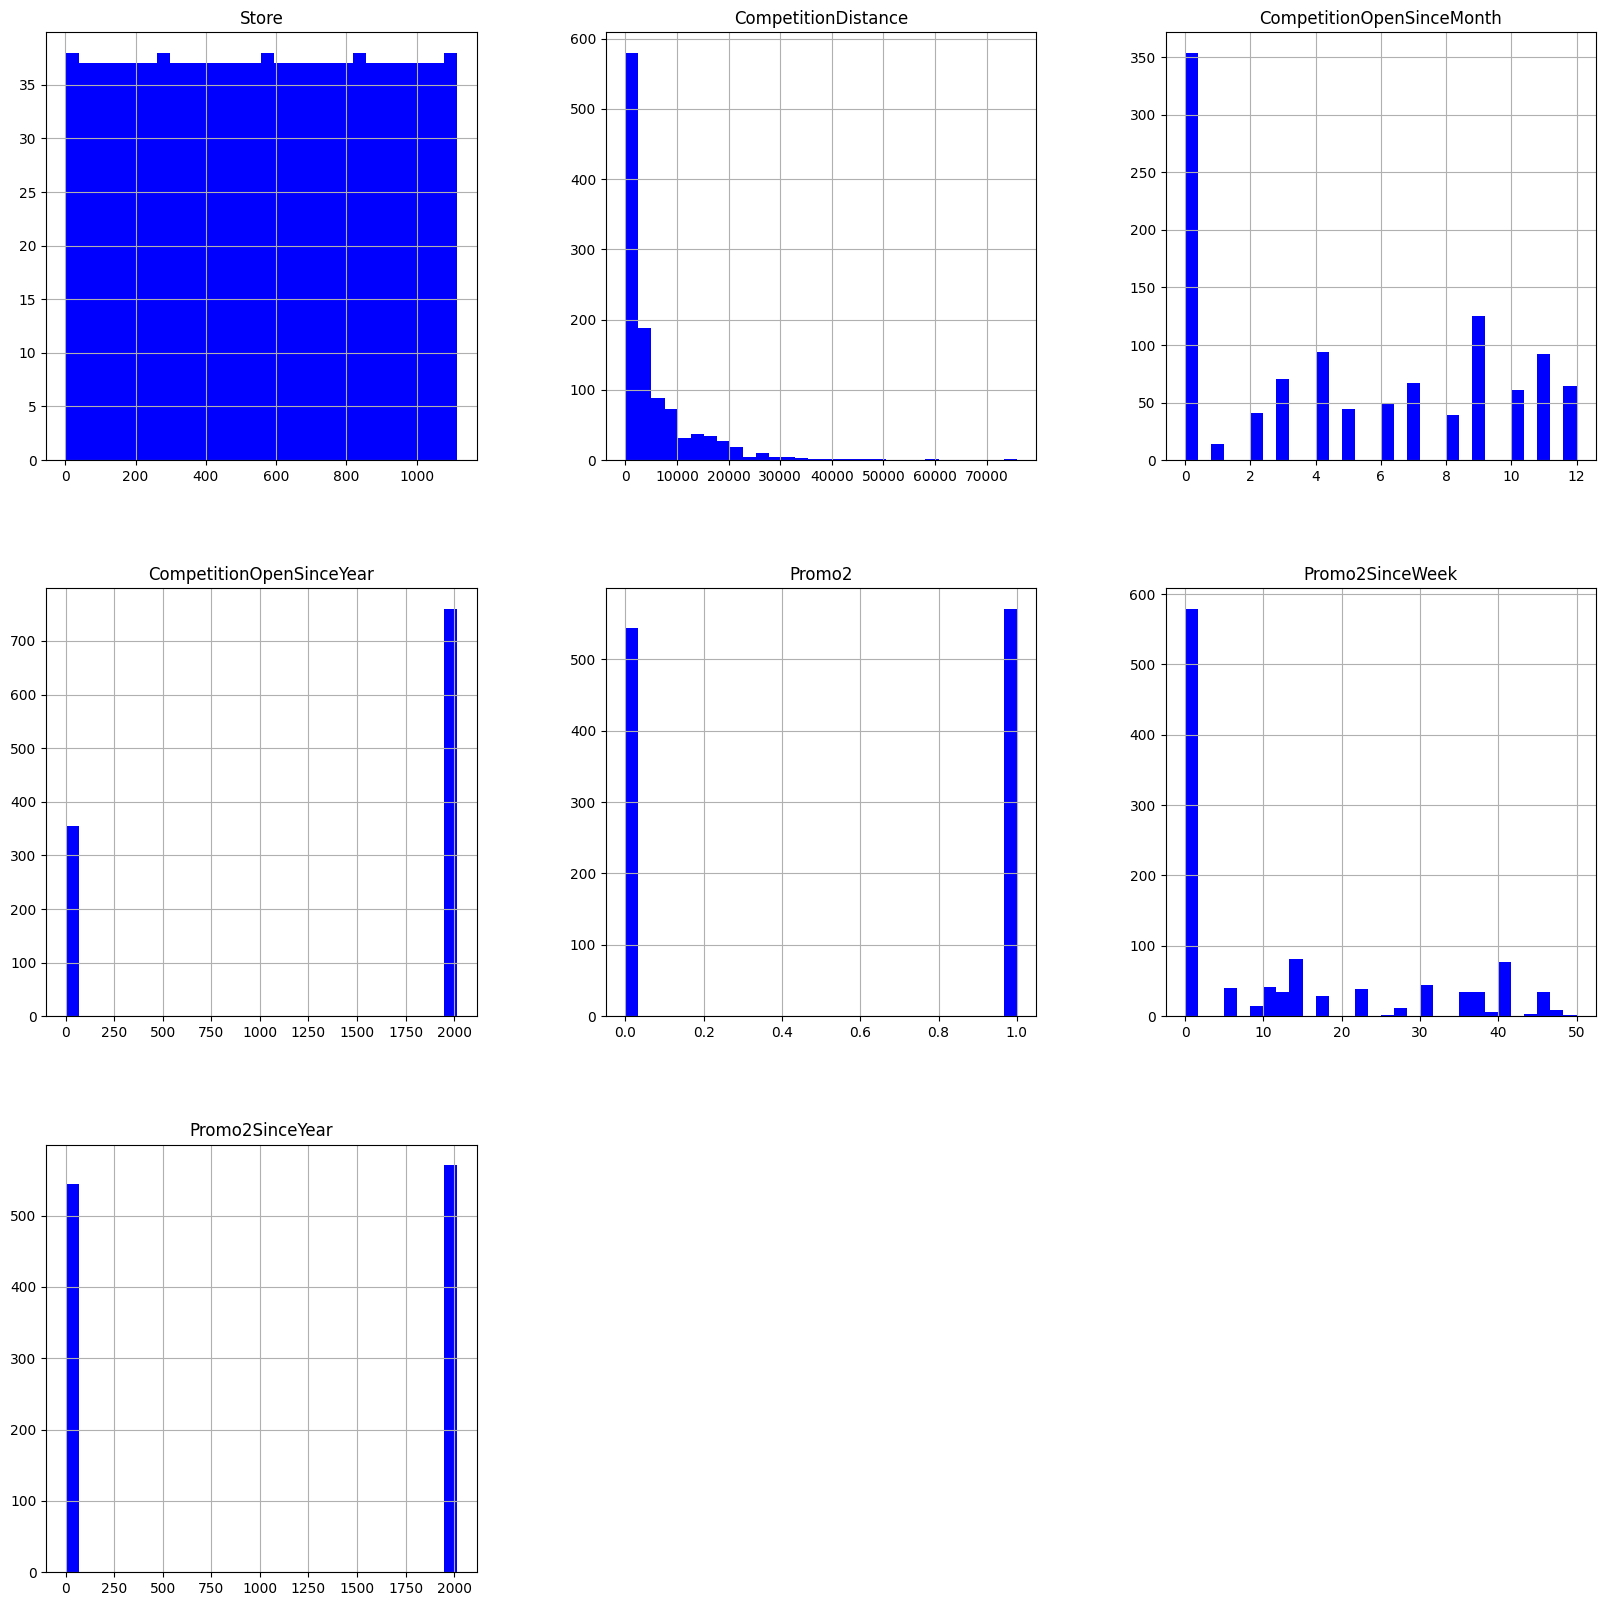

In [137]:
Store_info_df.hist(bins=30, figsize=(20,20), color = 'b')

# **Dados Unidos (vendas + lojas)**

In [138]:
Base.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1.0,0,1.0


In [139]:
Store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [140]:
# junta duas base de dados
Dados_all_df = pd.merge(Base, Store_info_df, how='inner', on='Store')

In [141]:
Dados_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [142]:
Dados_all_df.shape

(187315, 17)

In [143]:
Dados_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
187310,292,5,2015-01-16,6153,755,1.0,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
187311,292,4,2015-01-15,5185,673,1.0,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
187312,292,3,2015-01-14,6564,798,1.0,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
187313,292,2,2015-01-13,7477,902,1.0,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
187314,292,1,2015-01-12,7326,862,1.0,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


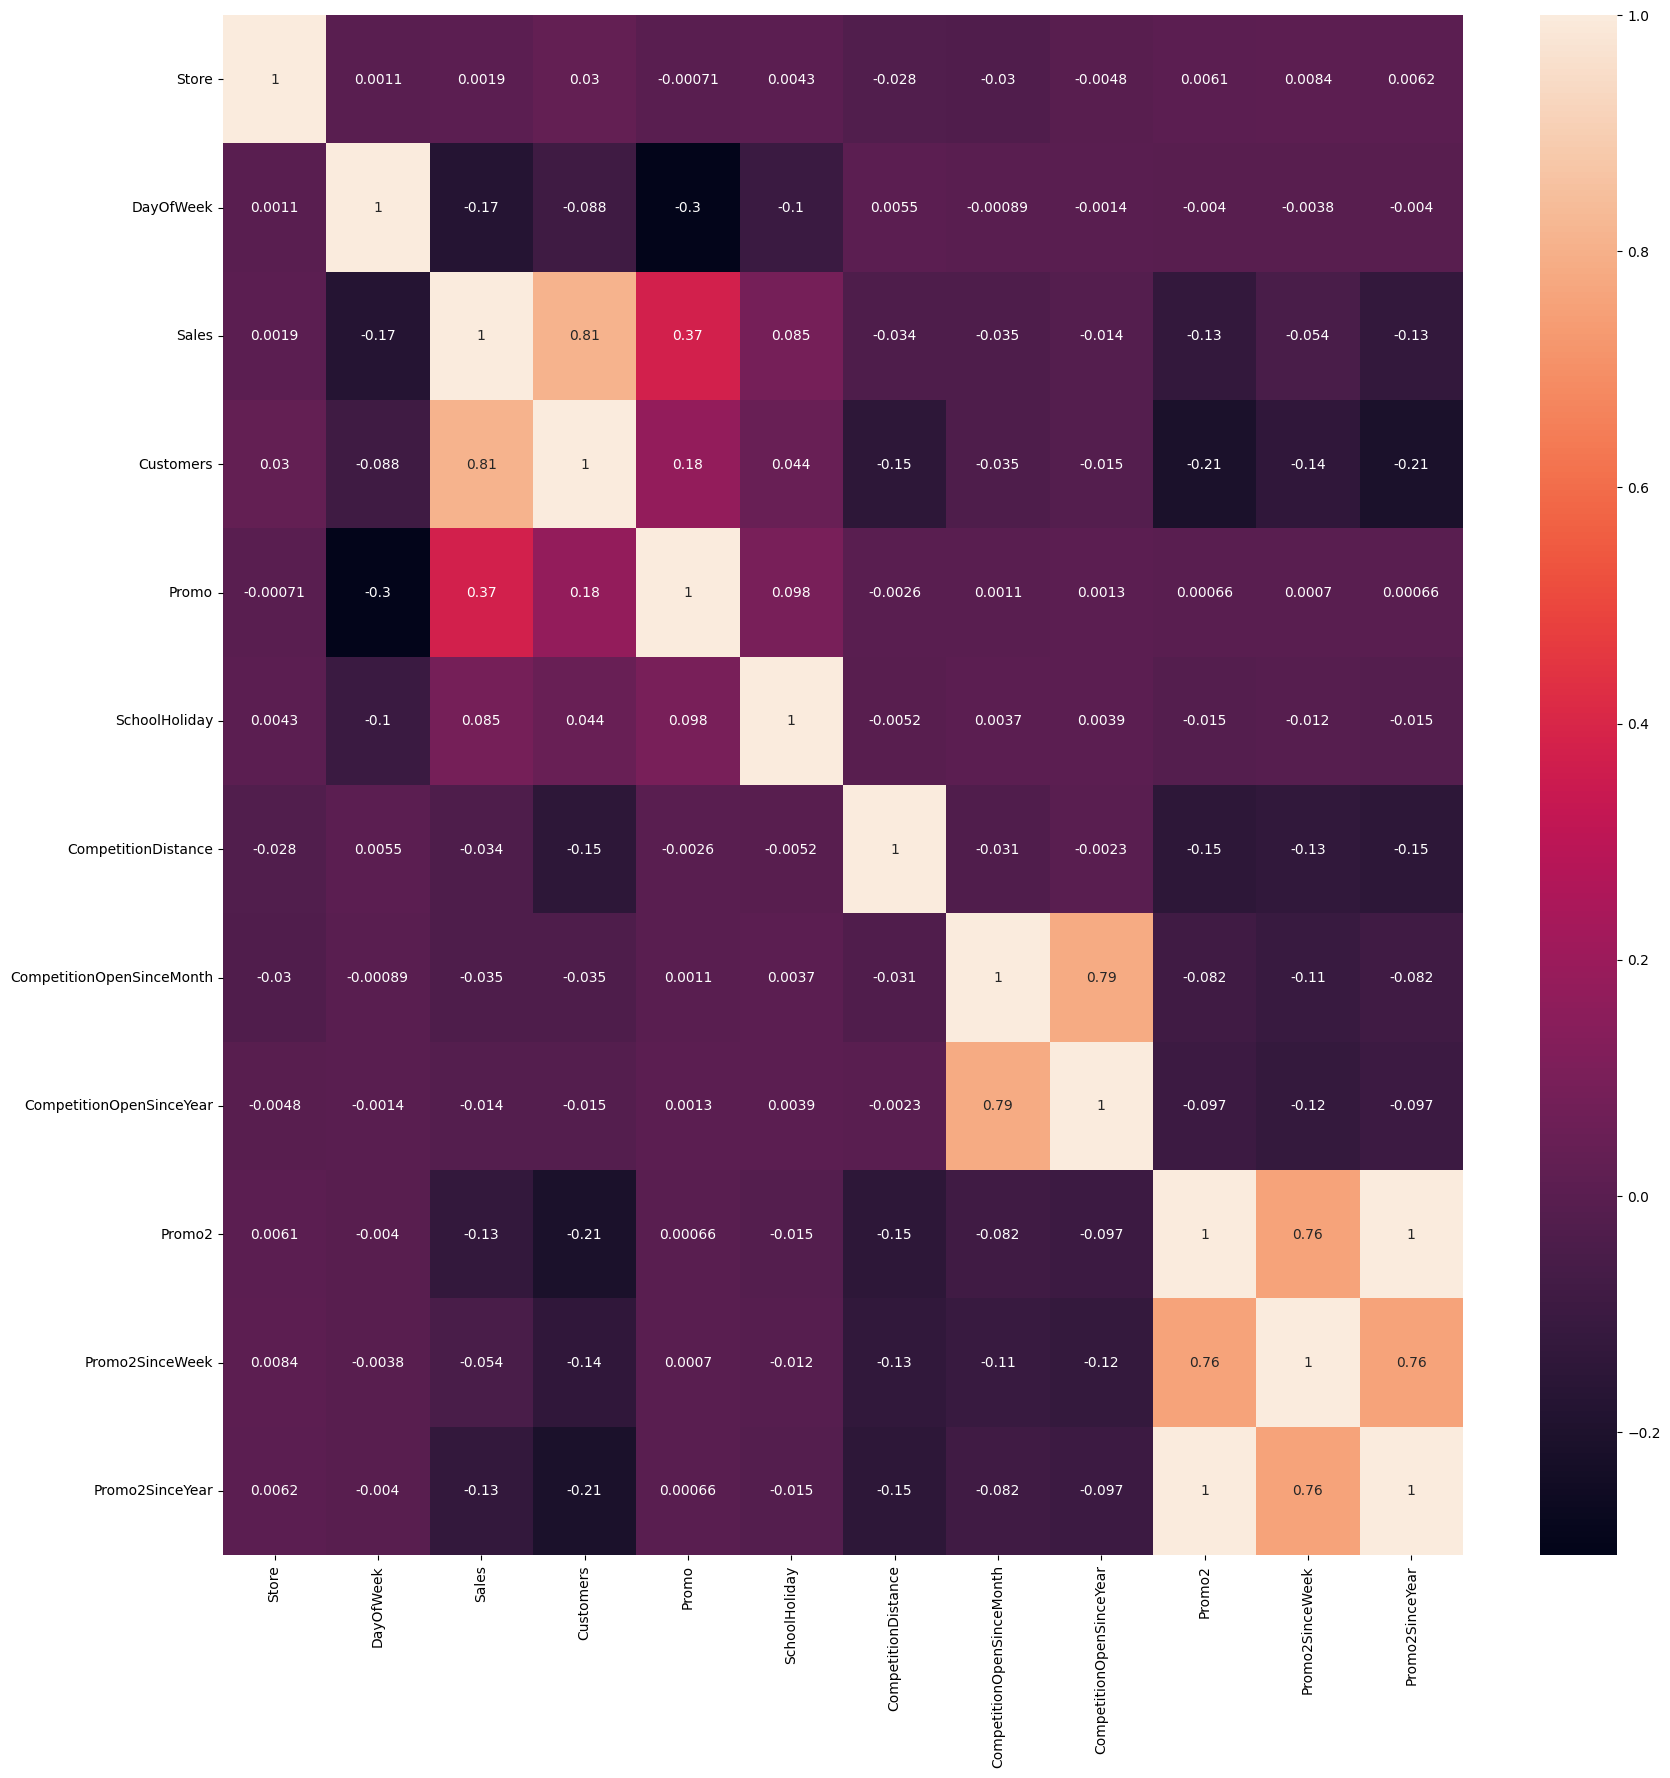

In [144]:

# correlations = sales_train_all_df.corr()
correlations = Dados_all_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

In [145]:

# correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations = Dados_all_df.corr(numeric_only=True)['Sales'].sort_values()
correlations

DayOfWeek                   -0.172371
Promo2SinceYear             -0.126573
Promo2                      -0.126563
Promo2SinceWeek             -0.054303
CompetitionOpenSinceMonth   -0.034844
CompetitionDistance         -0.034495
CompetitionOpenSinceYear    -0.014462
Store                        0.001932
SchoolHoliday                0.085477
Promo                        0.374197
Customers                    0.806527
Sales                        1.000000
Name: Sales, dtype: float64

In [146]:
Dados_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [147]:
# vamos separa datas como dia , mes , anos para facilitar na analiser com graficos
Dados_all_df['Year'] = pd.DatetimeIndex(Dados_all_df['Date']).year
Dados_all_df['Month'] = pd.DatetimeIndex(Dados_all_df['Date']).month
Dados_all_df['Day'] = pd.DatetimeIndex(Dados_all_df['Date']).day

In [148]:
Dados_all_df.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
5,1,6,2015-07-25,4364,500,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,25
6,1,5,2015-07-24,3706,459,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,24
7,1,4,2015-07-23,3769,503,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,23
8,1,3,2015-07-22,3464,463,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,22
9,1,2,2015-07-21,3558,469,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,21


Text(0.5, 1.0, 'Media de Vendas por mês')

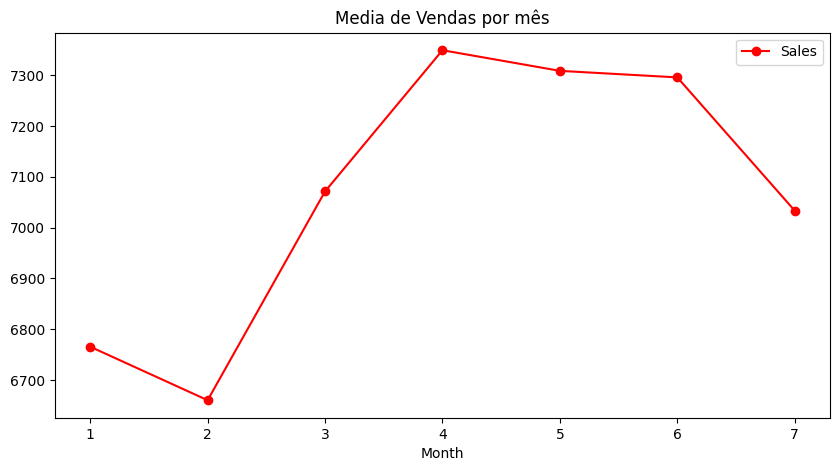

In [149]:
# Grafico de Media por mês
axis = Dados_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Media de Vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

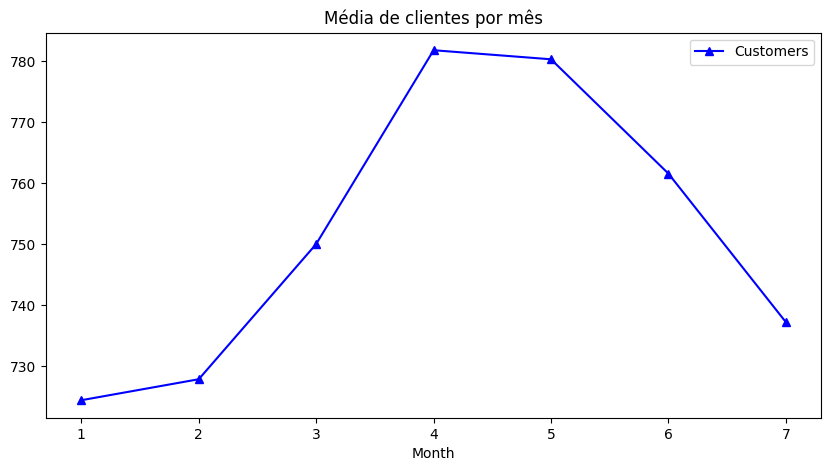

In [150]:
# Grafico de Media de cliente por mês.
axis = Dados_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

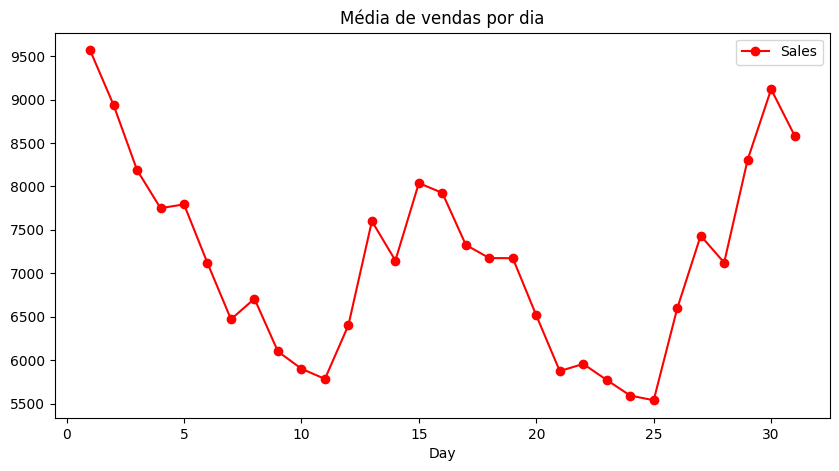

In [151]:
# Grafico de média por dia
axis = Dados_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

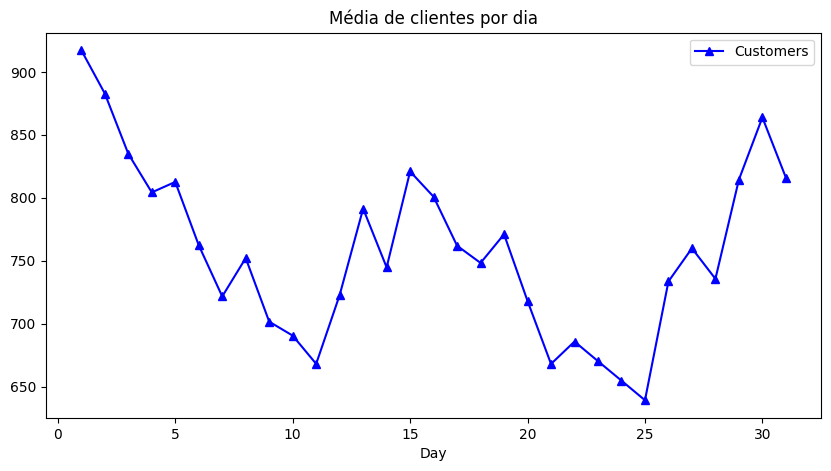

In [152]:
axis = Dados_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

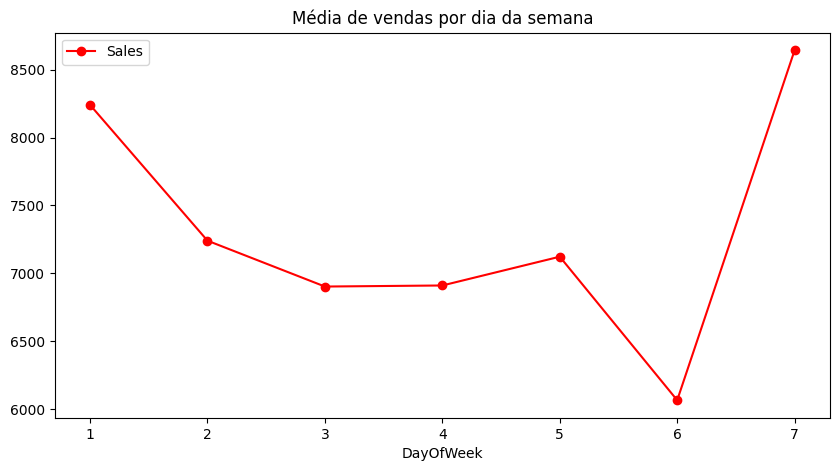

In [153]:
# Grafico média de vendas por dia da semana
axis = Dados_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

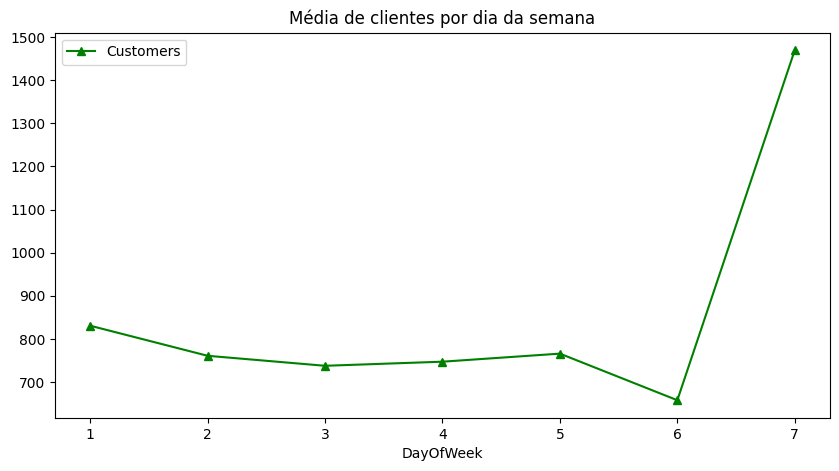

In [154]:
axis = Dados_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'g')
axis.set_title('Média de clientes por dia da semana')

<Axes: xlabel='Date'>

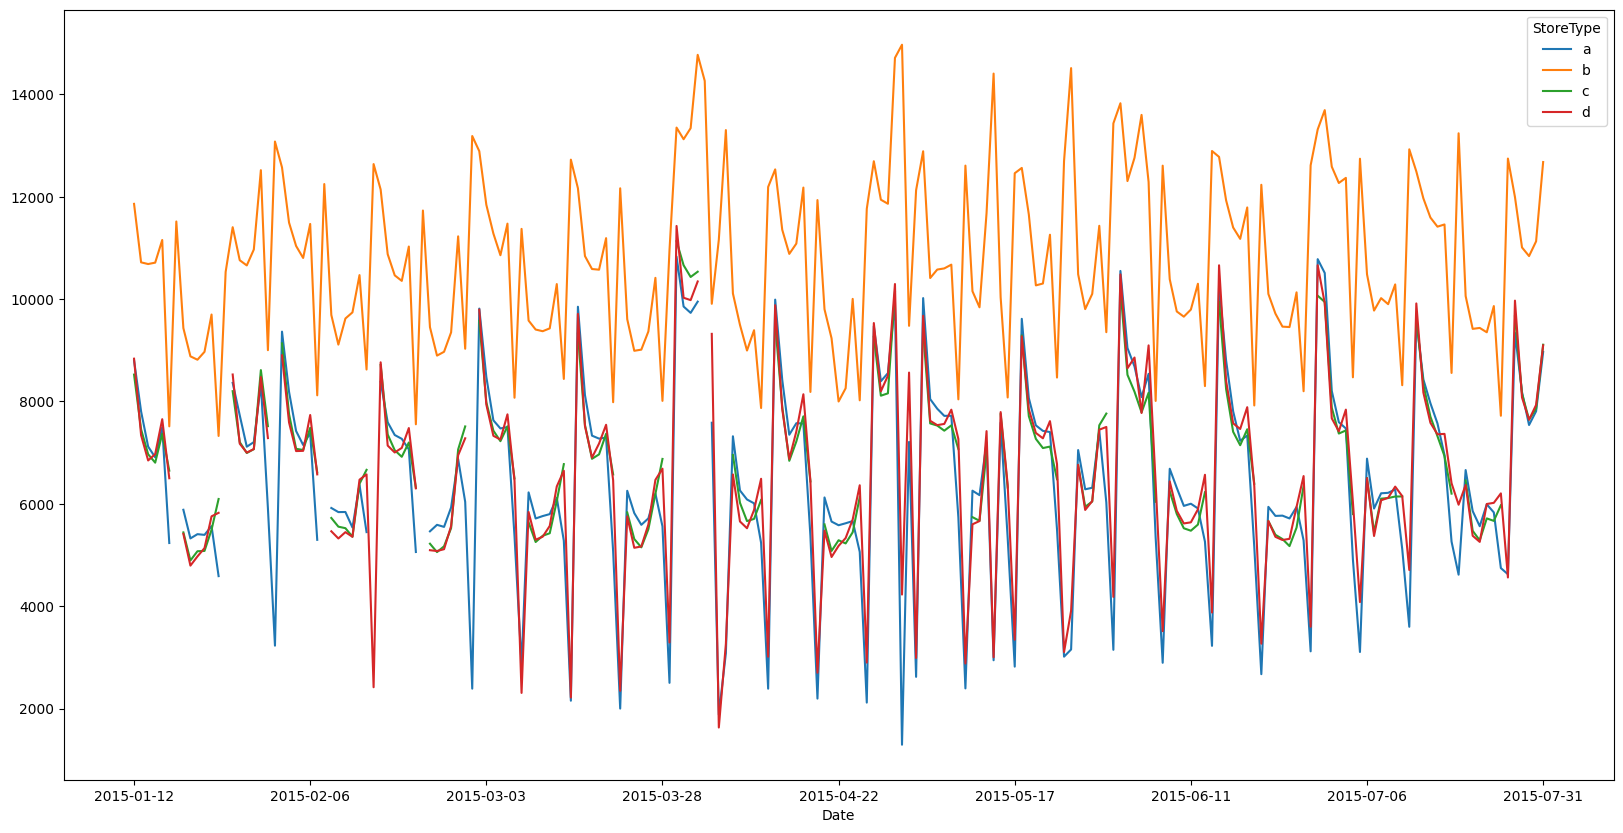

In [155]:
fig, ax = plt.subplots(figsize = (20,10))
# sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)
Dados_all_df.groupby(['Date', 'StoreType']).mean(numeric_only=True)['Sales'].unstack().plot(ax = ax)

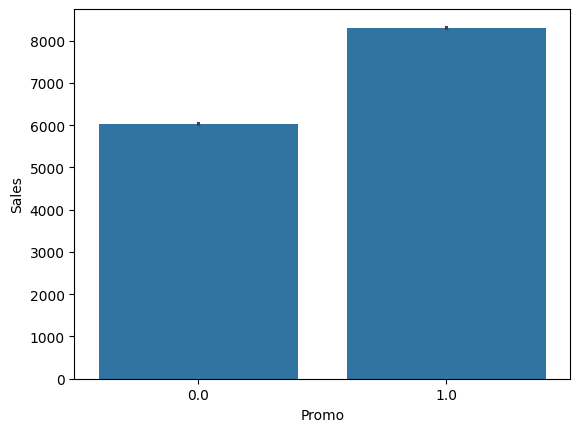

In [156]:

sns.barplot(x = 'Promo', y = 'Sales', data = Dados_all_df);

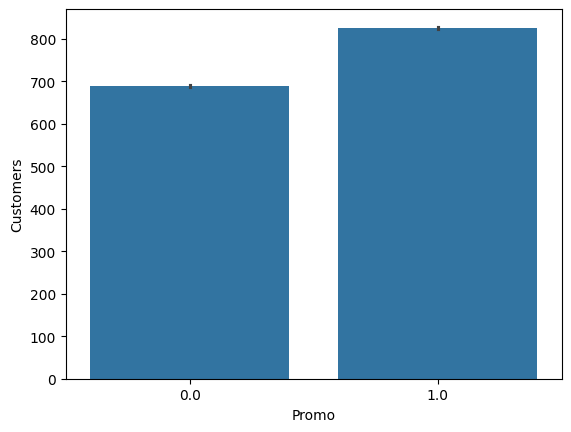

In [157]:
sns.barplot(x = 'Promo', y = 'Customers', data = Dados_all_df);

# **Treinamento do modelo**

In [158]:
!pip install fbprophet
#!pip install prophe

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.1-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.3 MB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.wh

In [159]:
# from fbprophet import Prophet
from prophet import Prophet

In [160]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [161]:
#df = sales_prediction(10, Dados_all_df, 60)
#df

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0tn0amp/lq0gr50i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0tn0amp/c_cao4c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84248', 'data', 'file=/tmp/tmpv0tn0amp/lq0gr50i.json', 'init=/tmp/tmpv0tn0amp/c_cao4c5.json', 'output', 'file=/tmp/tmpv0tn0amp/prophet_model41rpj1pa/prophet_model-20240618224754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


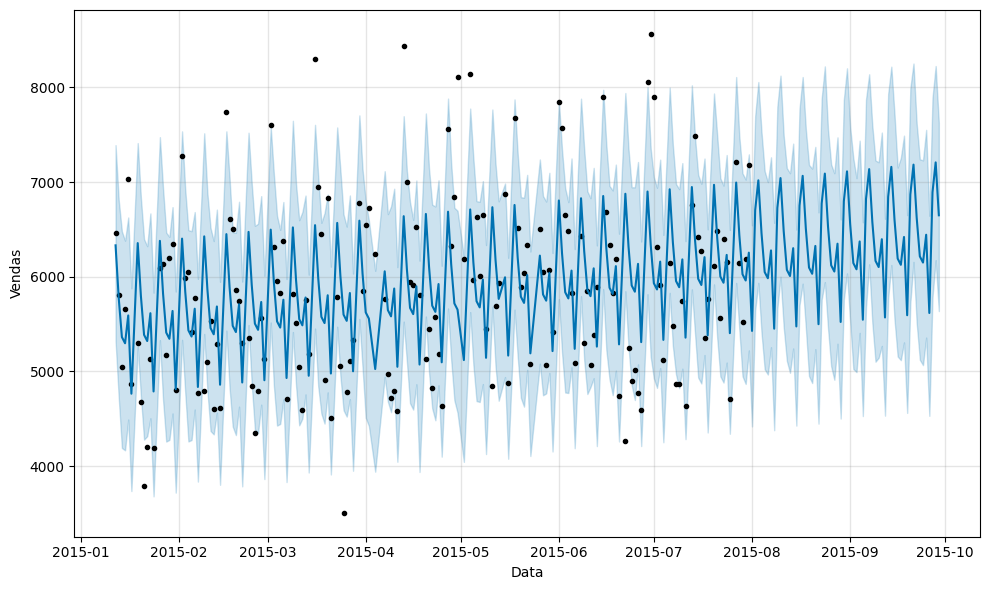

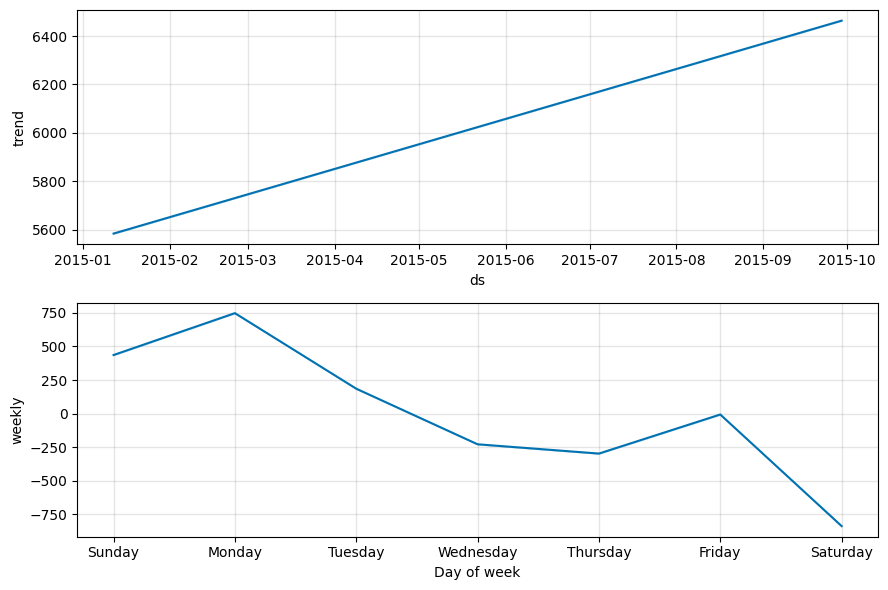

In [162]:
df_origin, df_prediction = sales_prediction(10, Dados_all_df, 60)

In [163]:
df_origin.shape, df_prediction.shape

((168, 2), (228, 16))

In [164]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-12,5584.003140,5324.270341,7390.365950,5584.003140,5584.003140,747.564645,747.564645,747.564645,747.564645,747.564645,747.564645,0.0,0.0,0.0,6331.567785
1,2015-01-13,5587.388195,4724.179159,6809.478652,5587.388195,5587.388195,185.433843,185.433843,185.433843,185.433843,185.433843,185.433843,0.0,0.0,0.0,5772.822038
2,2015-01-14,5590.773250,4190.683996,6478.712869,5590.773250,5590.773250,-228.201667,-228.201667,-228.201667,-228.201667,-228.201667,-228.201667,0.0,0.0,0.0,5362.571583
3,2015-01-15,5594.158305,4165.774060,6381.028059,5594.158305,5594.158305,-297.320271,-297.320271,-297.320271,-297.320271,-297.320271,-297.320271,0.0,0.0,0.0,5296.838034
4,2015-01-16,5597.543360,4491.320775,6625.819879,5597.543360,5597.543360,-6.616180,-6.616180,-6.616180,-6.616180,-6.616180,-6.616180,0.0,0.0,0.0,5590.927180


In [165]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
168,2015-08-01,6264.190649,4418.555621,6543.080313,6264.190649,6264.190649,-836.836400,-836.836400,-836.836400,-836.836400,-836.836400,-836.836400,0.0,0.0,0.0,5427.354249
169,2015-08-02,6267.573478,5644.832758,7697.109107,6267.573470,6267.573488,435.976029,435.976029,435.976029,435.976029,435.976029,435.976029,0.0,0.0,0.0,6703.549507
170,2015-08-03,6270.956307,5934.797011,8056.665458,6270.956266,6270.956358,747.564645,747.564645,747.564645,747.564645,747.564645,747.564645,0.0,0.0,0.0,7018.520952
171,2015-08-04,6274.339136,5407.575632,7528.089115,6274.339047,6274.339251,185.433843,185.433843,185.433843,185.433843,185.433843,185.433843,0.0,0.0,0.0,6459.772980
172,2015-08-05,6277.721966,5022.248347,7116.151085,6277.721804,6277.722178,-228.201667,-228.201667,-228.201667,-228.201667,-228.201667,-228.201667,0.0,0.0,0.0,6049.520299
173,2015-08-06,6281.104795,4966.734601,7000.161552,6281.104568,6281.105121,-297.320271,-297.320271,-297.320271,-297.320271,-297.320271,-297.320271,0.0,0.0,0.0,5983.784524
174,2015-08-07,6284.487624,5254.986013,7261.545277,6284.487315,6284.488053,-6.616180,-6.616180,-6.616180,-6.616180,-6.616180,-6.616180,0.0,0.0,0.0,6277.871444
175,2015-08-08,6287.870453,4378.131621,6569.593434,6287.870045,6287.871012,-836.836400,-836.836400,-836.836400,-836.836400,-836.836400,-836.836400,0.0,0.0,0.0,5451.034054
176,2015-08-09,6291.253282,5660.610415,7796.694931,6291.252777,6291.253985,435.976029,435.976029,435.976029,435.976029,435.976029,435.976029,0.0,0.0,0.0,6727.229311
177,2015-08-10,6294.636112,6000.272237,8124.265453,6294.635511,6294.636946,747.564645,747.564645,747.564645,747.564645,747.564645,747.564645,0.0,0.0,0.0,7042.200757


In [166]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [167]:
df_origin.tail()

,ds,y
1513,2015-07-27,7212
1512,2015-07-28,6140
1511,2015-07-29,5524
1510,2015-07-30,6186
1509,2015-07-31,7185


# **Treinamento Modelo  Feriados 2**

 - StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado
   - SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
  

In [168]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [170]:
Dados_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [171]:
school_holidays = Dados_all_df[Dados_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(28466,)

In [172]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2015-02-04',
       '2015-02-03', '2015-02-02'], dtype=object)

In [173]:
len(np.unique(school_holidays))

93

In [174]:
state_holidays = Dados_all_df[(Dados_all_df['StateHoliday'] == 'a') |
                                    (Dados_all_df['StateHoliday'] == 'b') |
                                    (Dados_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [175]:
state_holidays.shape

(221,)

In [176]:
len(np.unique(state_holidays))

6

In [177]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-05-01,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
216,2015-06-04,state_holiday
217,2015-05-25,state_holiday
218,2015-05-14,state_holiday
219,2015-04-06,state_holiday


In [178]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
28461,2015-02-06,school_holiday
28462,2015-02-05,school_holiday
28463,2015-02-04,school_holiday
28464,2015-02-03,school_holiday


In [179]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-05-01,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
28461,2015-02-06,school_holiday
28462,2015-02-05,school_holiday
28463,2015-02-04,school_holiday
28464,2015-02-03,school_holiday


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0tn0amp/bmkv9jmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0tn0amp/kp7ofqw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31602', 'data', 'file=/tmp/tmpv0tn0amp/bmkv9jmh.json', 'init=/tmp/tmpv0tn0amp/kp7ofqw4.json', 'output', 'file=/tmp/tmpv0tn0amp/prophet_modelwscoykk7/prophet_model-20240618224859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:48:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:48:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


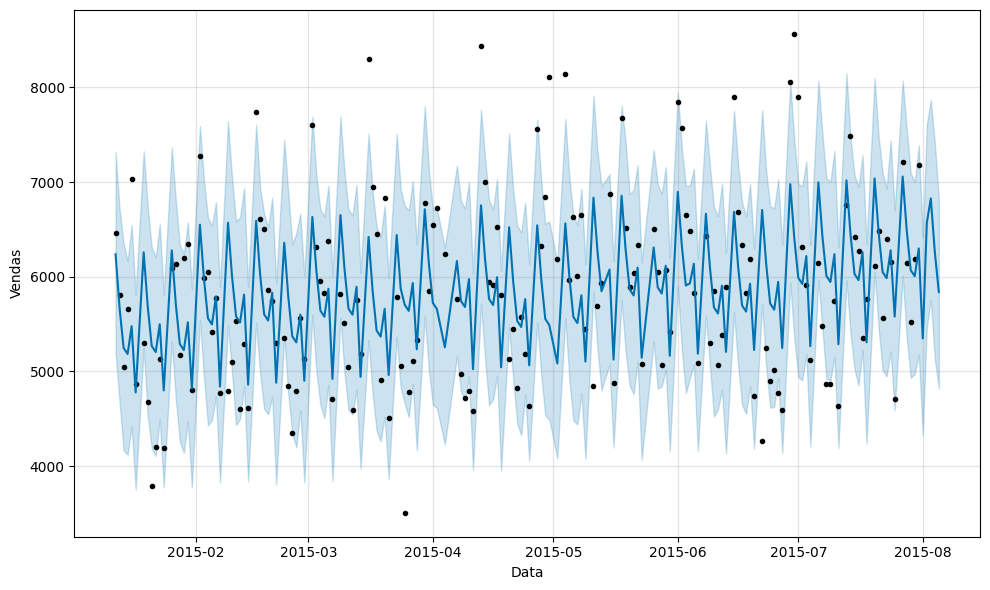

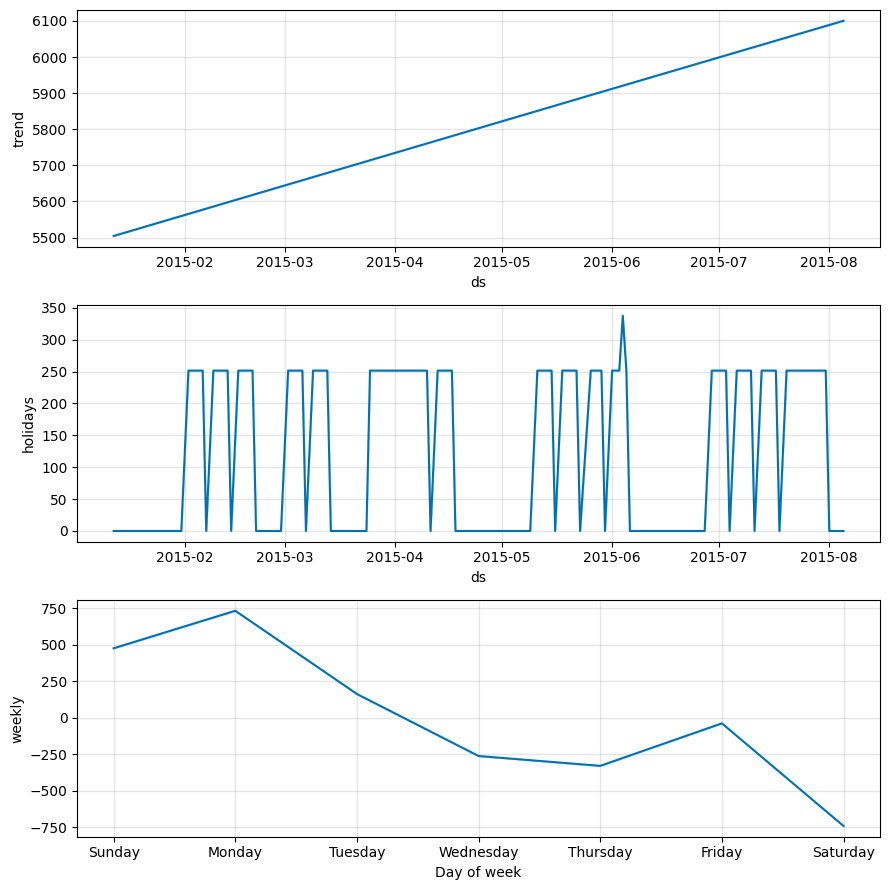

In [180]:
df_original, df_prediction = sales_prediction(10, Dados_all_df, school_state_holidays, 5)

In [181]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,state_holiday,state_holiday_lower,state_holiday_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-12,5504.468550,5201.705746,7315.128849,5504.468550,5504.468550,732.598635,732.598635,732.598635,0.0,...,0.0,0.0,0.0,732.598635,732.598635,732.598635,0.0,0.0,0.0,6237.067185
1,2015-01-13,5507.382903,4669.176106,6716.646822,5507.382903,5507.382903,162.607499,162.607499,162.607499,0.0,...,0.0,0.0,0.0,162.607499,162.607499,162.607499,0.0,0.0,0.0,5669.990402
2,2015-01-14,5510.297255,4163.387535,6353.216756,5510.297255,5510.297255,-262.058209,-262.058209,-262.058209,0.0,...,0.0,0.0,0.0,-262.058209,-262.058209,-262.058209,0.0,0.0,0.0,5248.239046
3,2015-01-15,5513.211608,4120.008403,6163.970995,5513.211608,5513.211608,-329.523814,-329.523814,-329.523814,0.0,...,0.0,0.0,0.0,-329.523814,-329.523814,-329.523814,0.0,0.0,0.0,5183.687793
4,2015-01-16,5516.125960,4419.269523,6544.252299,5516.125960,5516.125960,-38.327050,-38.327050,-38.327050,0.0,...,0.0,0.0,0.0,-38.327050,-38.327050,-38.327050,0.0,0.0,0.0,5477.798910
